### Step 1: Get climate data from ECAD

In [68]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Read the data into a DataFrame
Reading the ECAD data into pandas is a bit trickier than a standard CSV file. You will need to inspect the file in a text editor (not Excel). Pay attention to the following:

what is the column separator?
are there any headers?
how many lines contain comments before the real data starts?
Look up the parameters of pd.read_csv(). They are sufficient to read the file.

In [47]:
df = pd.read_csv('ECA_blended_custom/TG_STAID004586.txt')
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53564,111448,20220827,205,0
53565,111448,20220828,177,0
53566,127932,20220829,165,0
53567,127932,20220830,173,0


### Step 3: Data Wrangling
The TG column contains the temperature measured in 0.1 Celsius degrees. This was probably established decades ago when disk space and memory were more expensive (integers take less space).

Create a new column by dividing the temperature by 10.
Plot the raw temperature data as a line plot.

In [48]:
print(df.columns.tolist())

['SOUID', 'DATE', 'TG', 'Q_TG']


<AxesSubplot:xlabel='DATE'>

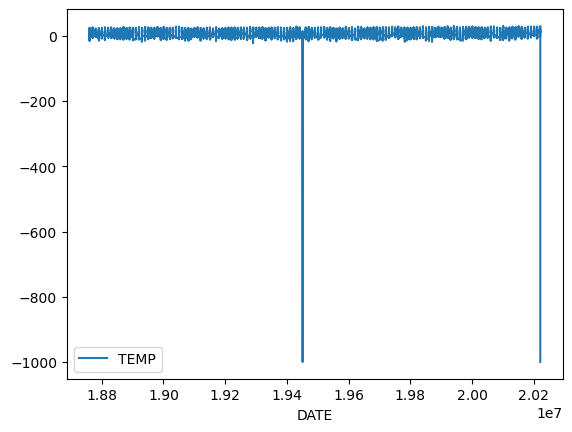

In [49]:
df['TEMP'] = df['TG'] / 10
df.plot.line(y='TEMP',x='DATE')

### Step 4: Time Axis
The DATE column contains timestamps in the YYYYMMDD format. You need to convert these to pandas timestamps.

First, convert the DATE column to a string data type.

In [50]:
df['DATE'] = df['DATE'].astype('string')
df

,SOUID,DATE,TG,Q_TG,TEMP
0,127488,18760101,22,0,2.2
1,127488,18760102,25,0,2.5
2,127488,18760103,3,0,0.3
3,127488,18760104,-58,0,-5.8
4,127488,18760105,-98,0,-9.8
...,...,...,...,...,...
53564,111448,20220827,205,0,20.5
53565,111448,20220828,177,0,17.7
53566,127932,20220829,165,0,16.5
53567,127932,20220830,173,0,17.3


Second, use the following expression to slice off year, month and day:

In [51]:
df['Y'] = df['DATE'].str[:4]
df['M'] = df['DATE'].str[4:6]
df['D'] = df['DATE'].str[6:8]
df

,SOUID,DATE,TG,Q_TG,TEMP,Y,M,D
0,127488,18760101,22,0,2.2,1876,01,01
1,127488,18760102,25,0,2.5,1876,01,02
2,127488,18760103,3,0,0.3,1876,01,03
3,127488,18760104,-58,0,-5.8,1876,01,04
4,127488,18760105,-98,0,-9.8,1876,01,05
...,...,...,...,...,...,...,...,...
53564,111448,20220827,205,0,20.5,2022,08,27
53565,111448,20220828,177,0,17.7,2022,08,28
53566,127932,20220829,165,0,16.5,2022,08,29
53567,127932,20220830,173,0,17.3,2022,08,30


Put the elements into separate columns. Then, create a new date column via string concatenation:

In [52]:
df['DATE'] = df['Y']+'-'+df['M']+'-'+df['D']
df

,SOUID,DATE,TG,Q_TG,TEMP,Y,M,D
0,127488,1876-01-01,22,0,2.2,1876,01,01
1,127488,1876-01-02,25,0,2.5,1876,01,02
2,127488,1876-01-03,3,0,0.3,1876,01,03
3,127488,1876-01-04,-58,0,-5.8,1876,01,04
4,127488,1876-01-05,-98,0,-9.8,1876,01,05
...,...,...,...,...,...,...,...,...
53564,111448,2022-08-27,205,0,20.5,2022,08,27
53565,111448,2022-08-28,177,0,17.7,2022,08,28
53566,127932,2022-08-29,165,0,16.5,2022,08,29
53567,127932,2022-08-30,173,0,17.3,2022,08,30


The final date column should have the format YYYY-MM-DD. Now you can convert the strings with dates into a timestamp index with:

In [53]:
df = df.set_index(pd.to_datetime(df['DATE']))

Plot the temperature as a line plot again. Now, the x-axis should look much better.

<AxesSubplot:xlabel='Y'>

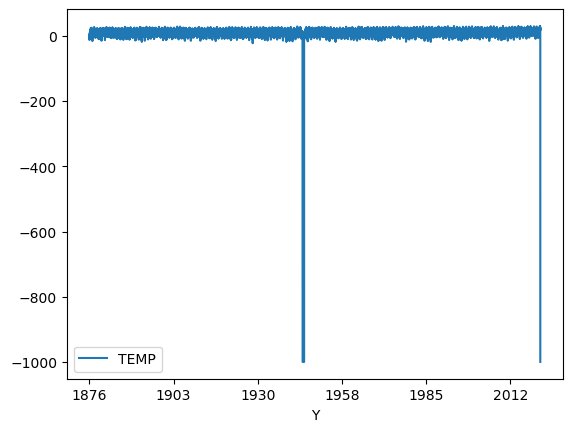

In [54]:
df.plot(y='TEMP', x ='Y')

### Step 5: Missing Values
For some cities, the data may contain missing values. In the original files the value -9999 is used. This can be done with the replace() method:

In [55]:
median = df['TEMP'].mean()
df['TEMP'] = df['TEMP'].replace(-999.9, median)

df

,SOUID,DATE,TG,Q_TG,TEMP,Y,M,D
DATE,,,,,,,,
1876-01-01,127488,1876-01-01,22,0,2.200000,1876,01,01
1876-01-02,127488,1876-01-02,25,0,2.500000,1876,01,02
1876-01-03,127488,1876-01-03,3,0,0.300000,1876,01,03
1876-01-04,127488,1876-01-04,-58,0,-5.800000,1876,01,04
1876-01-05,127488,1876-01-05,-98,0,-9.800000,1876,01,05
...,...,...,...,...,...,...,...,...
2022-08-27,111448,2022-08-27,205,0,20.500000,2022,08,27
2022-08-28,111448,2022-08-28,177,0,17.700000,2022,08,28
2022-08-29,127932,2022-08-29,165,0,16.500000,2022,08,29


As a new value, use the overall median temperature. Place the result of the expression in a new column.

<AxesSubplot:xlabel='DATE'>

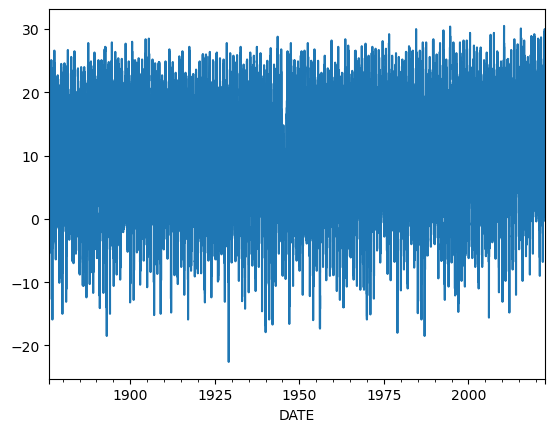

In [56]:
df['TEMP'].plot.line(y='YEAR')

### Step 6: Cut off the last year
Before calculating median temperatures, make sure the last year is complete as well. It can be cut off by slicing the index with a simple date string. Pandas takes care of the parsing:

In [57]:
df.loc['2021-12-31']

SOUID        111448
DATE     2021-12-31
TG              130
Q_TG              0
TEMP           13.0
Y              2021
M                12
D                31
Name: 2021-12-31 00:00:00, dtype: object

### tep 7: Aggregate
Now reduce the data to one value per year using the median. This could be done with a df.groupby():

In [58]:
df.groupby('Y')['TEMP'].median()

Y
1876     9.40
1877     8.50
1878    10.90
1879     7.90
1880     9.05
        ...  
2018    12.20
2019    10.90
2020    10.90
2021    10.00
2022    12.50
Name: TEMP, Length: 147, dtype: float64

However, with a timestamp index it is better to use df.resample():

<AxesSubplot:xlabel='DATE'>

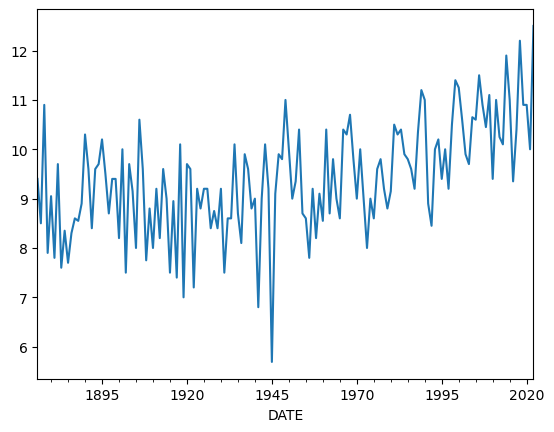

In [61]:
yearly = df['TEMP'].resample('Y').median()
yearly.plot()

The resampling has the advantage that you still have a timestamp index after the operation.

You may want to create a DataFrame out of the series:

<AxesSubplot:xlabel='DATE'>

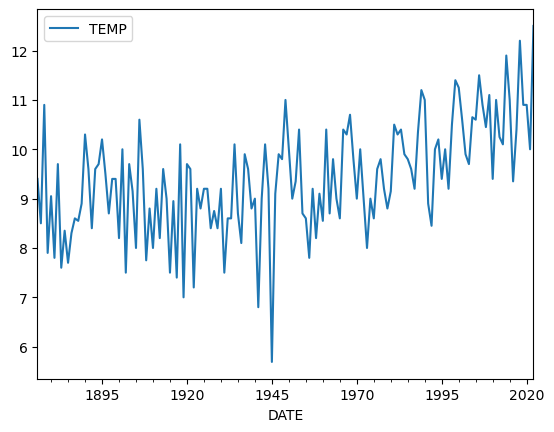

In [63]:
df = pd.DataFrame(yearly)
df.plot()

### Step 7: Heatmap
The seaborn library has a heatmap function that you can use to plot the stripes.

In [64]:
df1 = pd.DataFrame(yearly) 
df1.index = df1.index.year 
df1 = df1.transpose() 
df1

DATE,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
TEMP,9.4,8.5,10.9,7.9,9.05,7.8,9.7,7.6,8.35,7.7,...,10.1,11.9,11.0,9.35,10.4,12.2,10.9,10.9,10.0,12.5


<AxesSubplot:title={'center':'yearly median temperature in Berlin-Treptow'}, xlabel='DATE'>

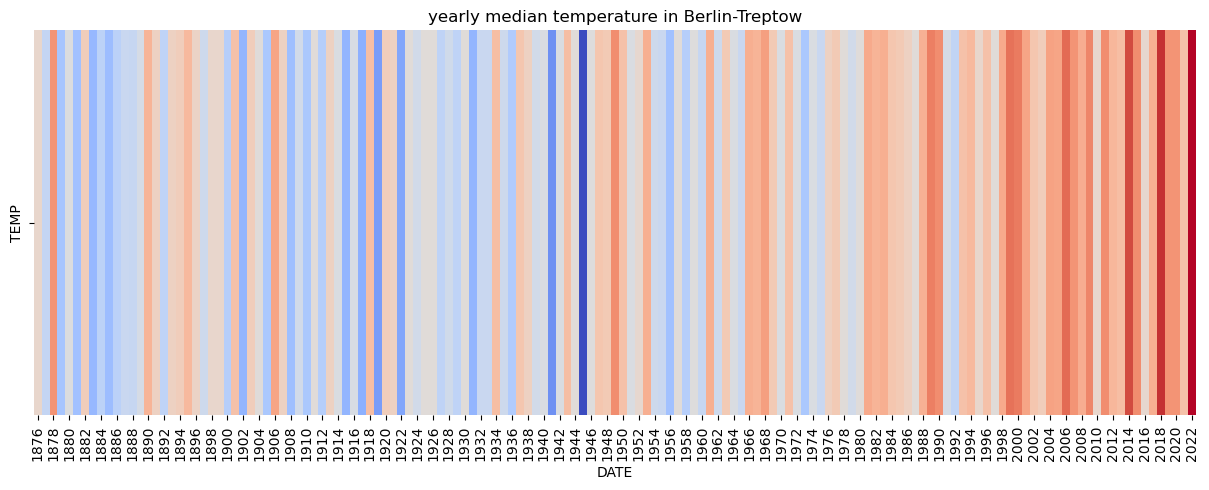

In [69]:
cmap = plt.get_cmap('coolwarm') 
plt.figure(figsize=(15, 5))
plt.title('yearly median temperature in Berlin-Treptow') 
sns.heatmap(df1, cmap=cmap, cbar=False,)# yticklabels=[], xticklabels=[])